In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('../data/salaries_position.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
X = df.iloc[:, 1:-1]  # level
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [5]:
y = df.iloc[:, -1]  # salary
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

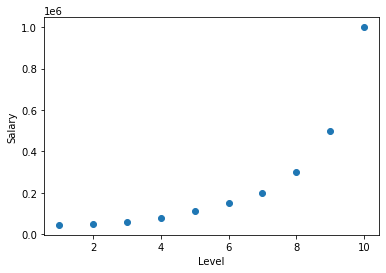

In [6]:
plt.scatter(X, y)
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

## 1. Regresión lineal

In [8]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

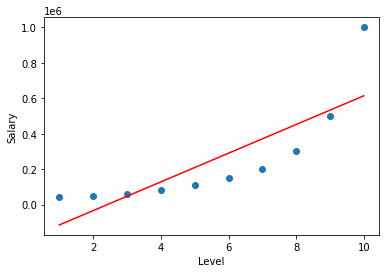

In [9]:
plt.scatter(X, y)

plt.plot(X, y_pred, c='r')

plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [11]:
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print('r2: ', r2)
print('mae: ', mae)

r2:  0.6690412331929895
mae:  128454.54545454544


## 2. Regresión polinómica

In [43]:
poly = PolynomialFeatures(degree=3)
X_polinomial = poly.fit_transform(X)
X_polinomial

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [34]:
model = LinearRegression()
model.fit(X_polinomial, y)
y_pred = model.predict(X_polinomial)

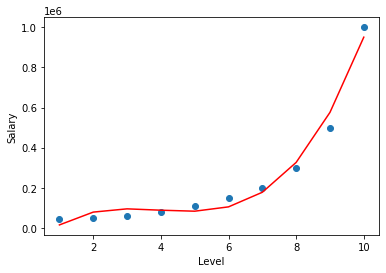

In [35]:
plt.scatter(X, y)

plt.plot(X, y_pred, c='r')

plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [36]:
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print('r2: ', round(r2, 4))
print('mae: ', round(mae, 4))

r2:  0.9812
mae:  34790.2098


para degree 2:
* R2 = 0.9162
* MAE = 70218.1818

para degree 3:
* R2 = 0.9812
* MAE = 34790.2098

Si la recta se ajusta demasiado a los datos podemos caer en overfitting, es decir, que el modelo sea capaz de predecir muy bien con los datos de entrenamiento pero mal con los nuevos datos que vayan llegando.